In [4]:
#import libraries

import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize']= (12,12)
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [5]:
stroke_df = pd.read_csv("stroke.csv")
print(stroke_df.shape)
stroke_df.head()

(5110, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
#Drop id column as it is not relevant in predicting the stroke 
stroke_df.drop(columns="id", inplace =True)

In [7]:
stroke_df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [8]:
print(stroke_df.shape)

(5110, 11)


In [9]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [10]:
#Description of numerical data
round(stroke_df.describe(),2)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,43.23,0.1,0.05,106.15,28.89,0.05
std,22.61,0.3,0.23,45.28,7.85,0.22
min,0.08,0.0,0.00,55.12,10.30,0.00
25%,25.00,0.0,0.00,77.24,23.50,0.00
50%,45.00,0.0,0.00,91.88,28.10,0.00
75%,61.00,0.0,0.00,114.09,33.10,0.00
max,82.00,1.0,1.00,271.74,97.60,1.00


In [12]:
#Description of categorical data
round(stroke_df.describe(exclude=['int64','float64']),2)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [13]:
#check for null values
stroke_df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

#### Observation : There are 201 null values in bmi column

<Axes: >

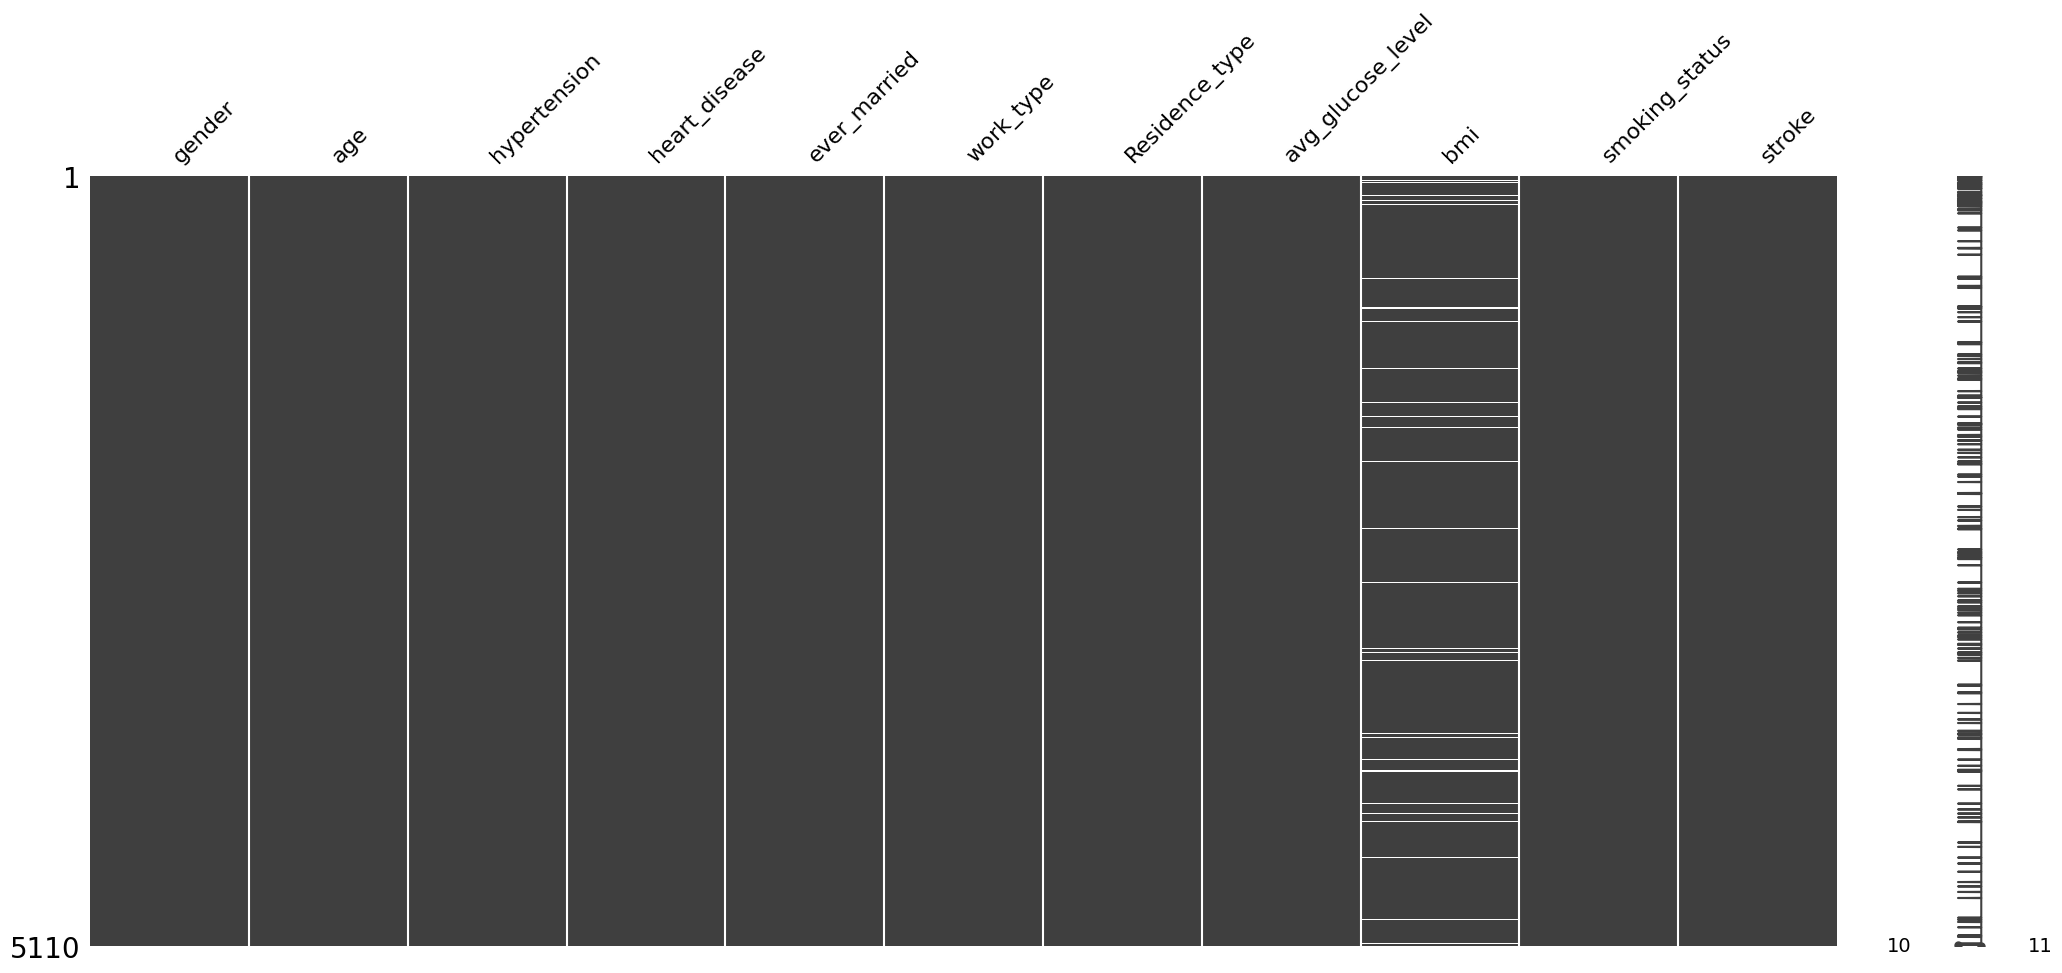

In [14]:
#visuializing the missing values
msno.matrix(stroke_df)

In [15]:
#Fill the missing values with mean of bmi column
stroke_df['bmi'].replace(np.NaN,stroke_df['bmi'].mean(), inplace =True)

In [16]:
stroke_df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [18]:
#Checking for duplicates
stroke_df.duplicated().sum()

0

####  Observation:  There is no duplicate entries

In [19]:
#Determining the number of unique values in each column
unique_values={}

for col in stroke_df.columns:
    unique_values[col]=stroke_df[col].unique().shape[0]
pd.DataFrame(unique_values,index=["No of unique values"]).transpose()

,No of unique values
gender,3
age,104
hypertension,2
heart_disease,2
ever_married,2
work_type,5
Residence_type,2
avg_glucose_level,3979
bmi,419
smoking_status,4


In [20]:
stroke_df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

#### Observation : The other category has only 1 entry which is very negotiable and thus it can be added to the male category as it has lower entry them female category

In [21]:
stroke_df['gender'] = stroke_df['gender'].replace('Other', 'Male')

In [22]:
stroke_df['gender'].value_counts()

Female    2994
Male      2116
Name: gender, dtype: int64

In [23]:
#Check for corellation between numerical columns
correlation = stroke_df.select_dtypes('number').corr()
correlation

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


<Axes: >

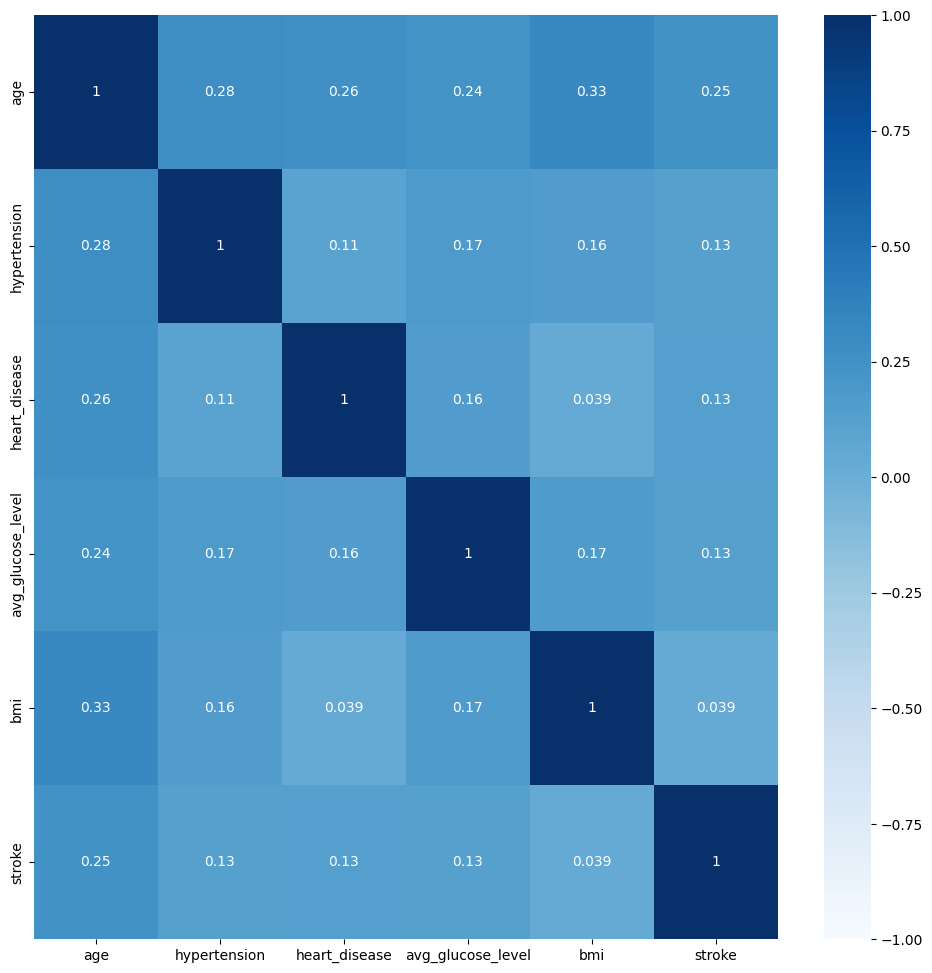

In [27]:
#Visualize the corellation
sns.heatmap(correlation, annot=True,vmin=-1,vmax=1,cmap="Blues")

<Figure size 7560x5760 with 0 Axes>

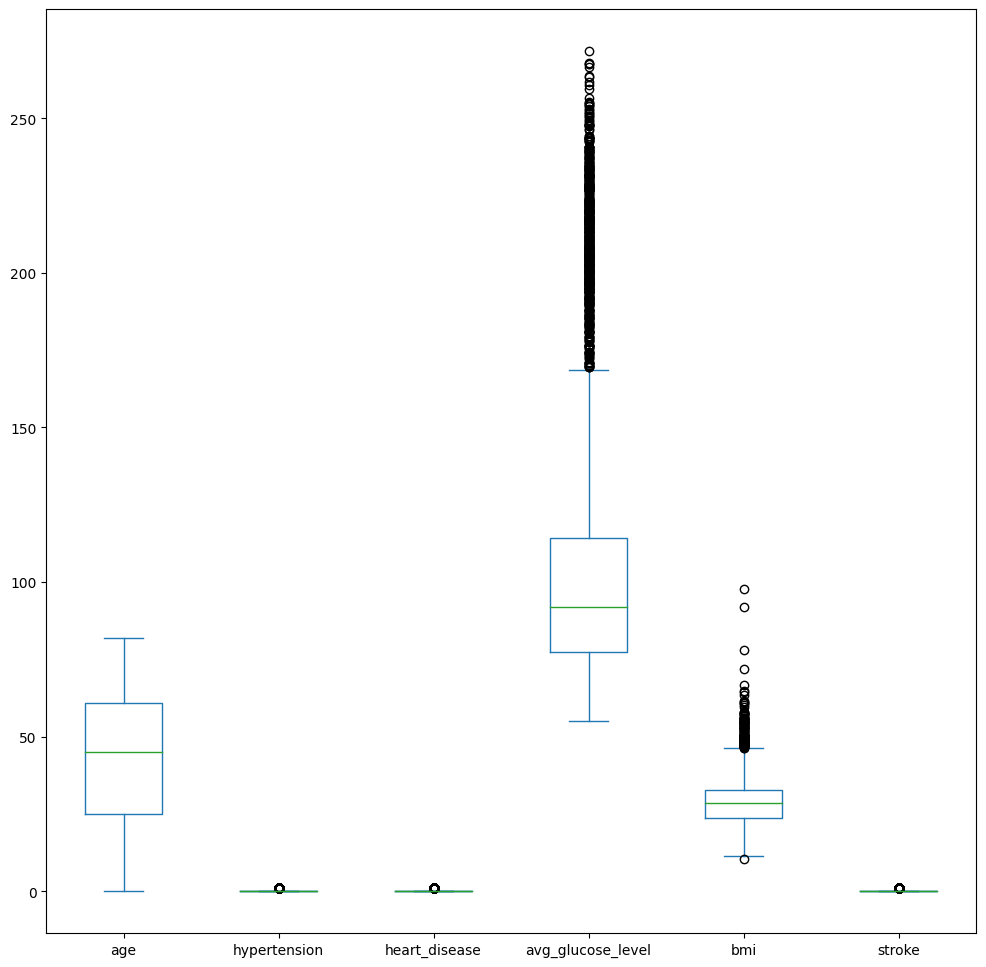

In [28]:
plt.figure(num=None,figsize=(8.4,6.4), dpi =900, facecolor='w',edgecolor='b')
stroke_df.plot(kind ='box')
plt.show()

In [30]:
stroke_df['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [31]:
(stroke_df['avg_glucose_level'] >125).value_counts()

False    4110
True     1000
Name: avg_glucose_level, dtype: int64

In [32]:
stroke_df['bmi'].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [33]:
(stroke_df['bmi'] >30).value_counts()

False    3217
True     1893
Name: bmi, dtype: int64

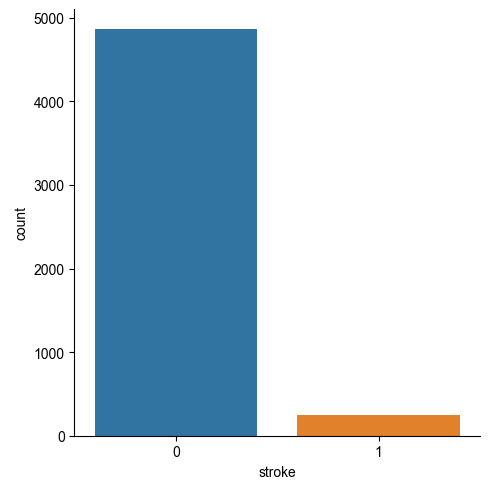

In [35]:
sns.catplot(data=stroke_df,x='stroke',kind='count')
sns.set_style('dark')
plt.show()

In [36]:
stroke_df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

#### Observation : The data is imbalanced

## Relationship between age and stroke

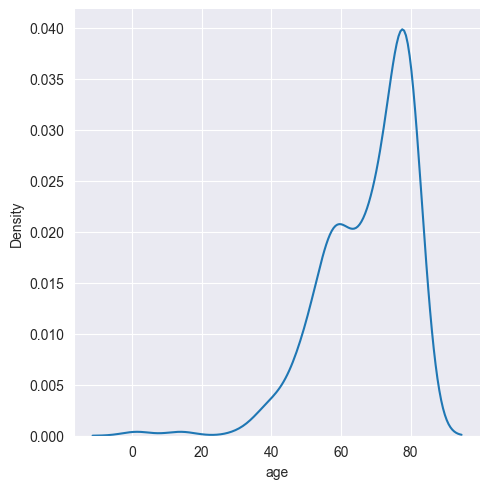

In [38]:
stroke= stroke_df[stroke_df['stroke']==1]
sns.displot(stroke['age'],kind ='kde')
sns.set_style('white')
plt.show()

#### Observation: Stroke rate appears to increase with increase in age

## Relationship between bmi and stroke

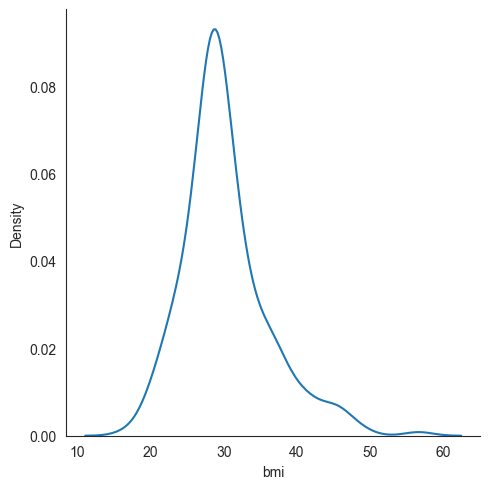

In [40]:
stroke= stroke_df[stroke_df['stroke']==1]
sns.displot(stroke['bmi'],kind ='kde')
sns.set_style('white')
plt.show()

#### Observation: The stroke rate is directly proportional to bmi , however it dropped for high bmi which could be due to other factors influencing the data.

## Relation between avg_glucose_level and stroke

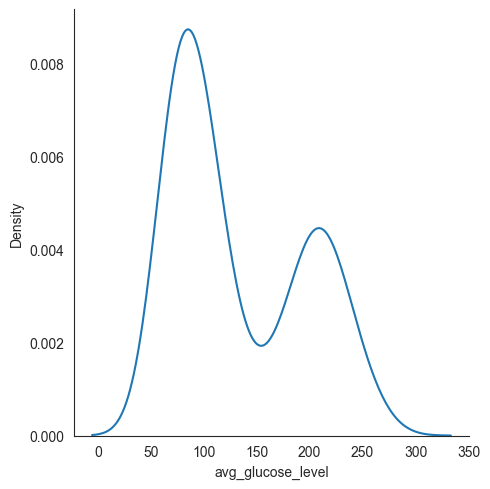

In [41]:
stroke= stroke_df[stroke_df['stroke']==1]
sns.displot(stroke['avg_glucose_level'],kind ='kde')
sns.set_style('white')
plt.show()

#### The relation between glucose level and stroke is uneven and nothing clear can be deduced.

## Understanding the relation between age , bmi and avg_glucose_level

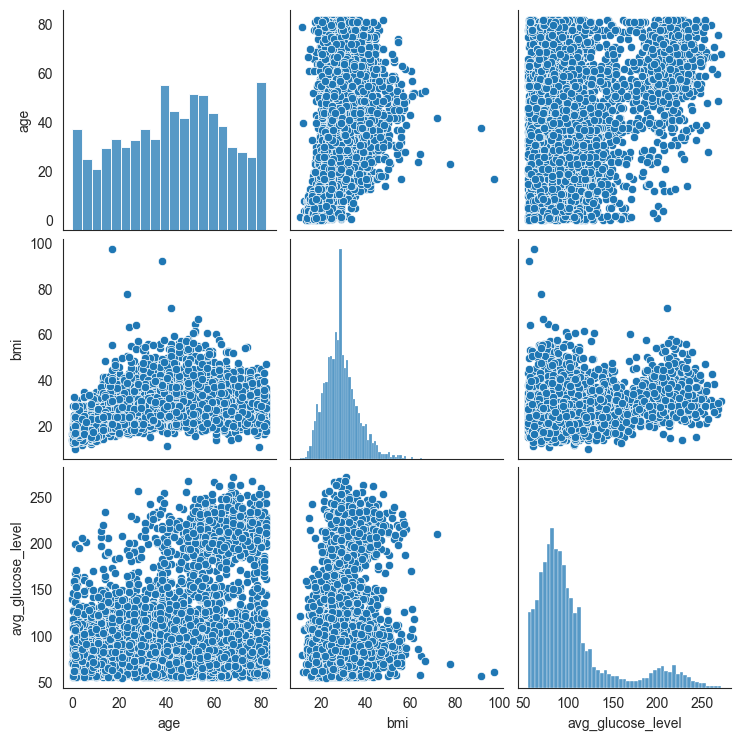

In [42]:
#Visualizing the relation between age,bmi and glucose_level
columns =['age','bmi','avg_glucose_level']
sns.pairplot(stroke_df[columns])
plt.show()

## Preprocessing

In [43]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [44]:
columns = ['gender','ever_married','work_type','Residence_type','smoking_status']

for column in columns:
    unique_values=stroke_df[column].unique()
    print(f"unique vales for {column}:{unique_values}")

unique vales for gender:['Male' 'Female']
unique vales for ever_married:['Yes' 'No']
unique vales for work_type:['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
unique vales for Residence_type:['Urban' 'Rural']
unique vales for smoking_status:['formerly smoked' 'never smoked' 'smokes' 'Unknown']


## Binary Encoding

In [45]:
labelencoder= LabelEncoder()
binary_cols = ["ever_married","Residence_type","gender"]
for col in binary_cols:
    stroke_df[col]= labelencoder.fit_transform(stroke_df[col])

In [46]:
stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1
2,1,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1
3,0,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1


## OneHot Encoding

In [47]:
stroke_df = pd.get_dummies(stroke_df,columns=['work_type', 'smoking_status','gender','ever_married','Residence_type'])

In [48]:
stroke_df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,...,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender_0,gender_1,ever_married_0,ever_married_1,Residence_type_0,Residence_type_1
0,67.0,0,1,228.69,36.600000,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,1
1,61.0,0,0,202.21,28.893237,1,0,0,0,1,...,0,0,1,0,1,0,0,1,1,0
2,80.0,0,1,105.92,32.500000,1,0,0,1,0,...,0,0,1,0,0,1,0,1,1,0
3,49.0,0,0,171.23,34.400000,1,0,0,1,0,...,0,0,0,1,1,0,0,1,0,1
4,79.0,1,0,174.12,24.000000,1,0,0,0,1,...,0,0,1,0,1,0,0,1,1,0


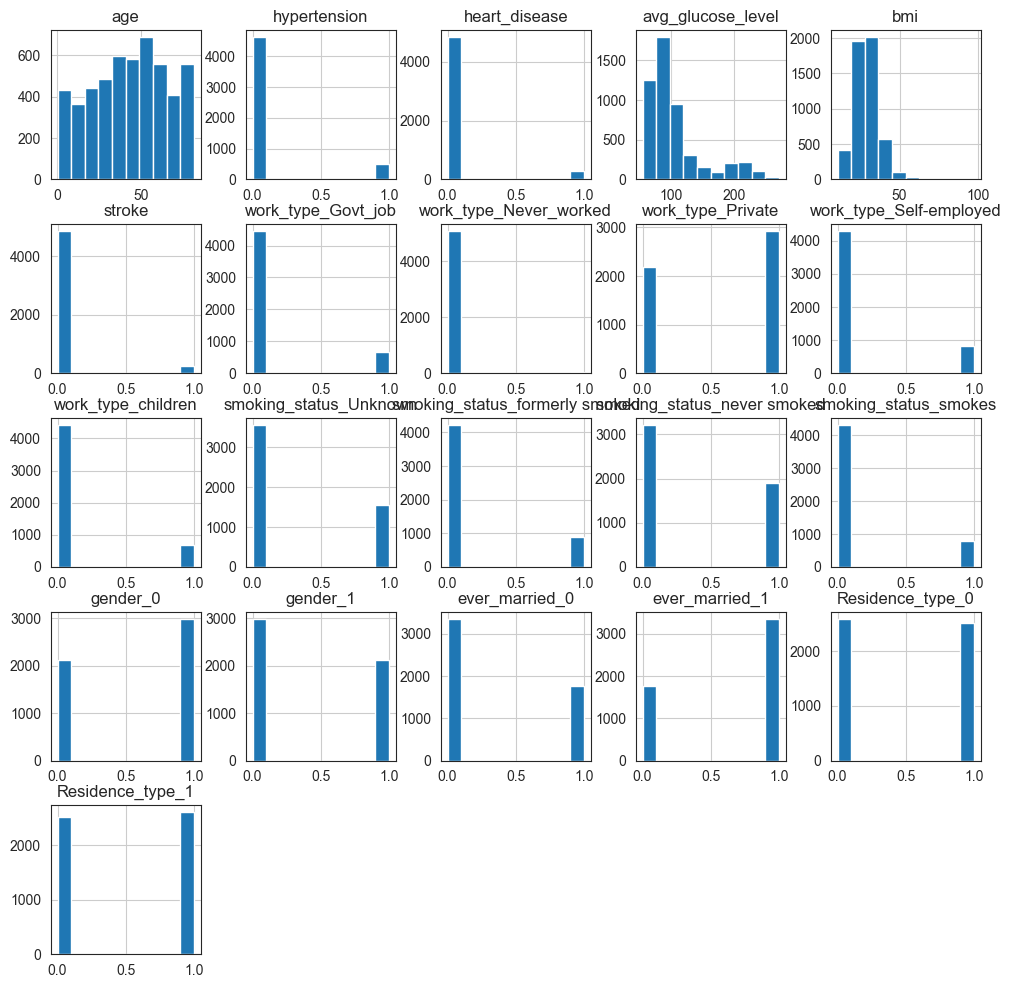

In [51]:
stroke_df.hist();

## Modelling

In [52]:
x = stroke_df.drop('stroke',axis=1)
x

,age,hypertension,heart_disease,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender_0,gender_1,ever_married_0,ever_married_1,Residence_type_0,Residence_type_1
0,67.0,0,1,228.69,36.600000,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1
1,61.0,0,0,202.21,28.893237,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0
2,80.0,0,1,105.92,32.500000,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0
3,49.0,0,0,171.23,34.400000,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1
4,79.0,1,0,174.12,24.000000,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1
5106,81.0,0,0,125.20,40.000000,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1
5107,35.0,0,0,82.99,30.600000,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0
5108,51.0,0,0,166.29,25.600000,0,0,1,0,0,0,1,0,0,0,1,0,1,1,0


In [53]:
y =stroke_df['stroke']
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [54]:
#Split the dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=True)

In [55]:
scaler = StandardScaler()
x_train_scaled= scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

### 1) Linear Regression

In [59]:
log_reg = LogisticRegression(class_weight = 'balanced')
param_grid = {
    'C':[0.01,0.1,1.0,10,100],
    'penalty':['none','l1','l2','elasticnet'],
    'solver':['newton-cg','lbfgs','liblinear','sag','saga']
}

grid_search = GridSearchCV(log_reg,param_grid,cv=5)
grid_search.fit(x_train_scaled,y_train)
print(grid_search.best_params_)

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [61]:
log_reg = LogisticRegression()
log_reg.fit(x_train_scaled,y_train)
y_pred = log_reg.predict(x_test_scaled)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [65]:
from sklearn.metrics import accuracy_score


acc = accuracy_score(y_test, y_pred)
print(acc)


0.9403131115459883


In [67]:

acc_train = log_reg.score(x_train_scaled, y_train)
print(acc_train)

0.9537671232876712


In [68]:

acc_test = log_reg.score(x_test_scaled, y_test)
print(acc_test)

0.9403131115459883


### 2) Random forest

In [70]:
rfc = RandomForestClassifier(class_weight='balanced')

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
}

grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)

{'max_depth': None, 'max_features': None, 'n_estimators': 100, 'random_state': 42}


In [71]:
rfc = RandomForestClassifier(max_depth=None,max_features=None,n_estimators=100,random_state=42)
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [72]:
rfc_acc = accuracy_score(y_test, y_pred)
print(rfc_acc)


0.9383561643835616


In [74]:

rfc_acc_train = rfc.score(x_train, y_train)
print(rfc_acc_train)

1.0


In [75]:
rfc_acc_test = rfc.score(x_test, y_test)
print(rfc_acc_test)

0.9383561643835616


### 3)Decision Tree Classifier

In [76]:
dt = DecisionTreeClassifier(class_weight='balanced')
param_grid={
    'max_depth':[3,4,5,6,7,8],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[1,2,3,4],
    'random_state':[0,42]
}
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)


{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}


In [78]:
dt = DecisionTreeClassifier(max_depth=8,min_samples_leaf=1,min_samples_split=2,random_state=0)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [79]:
dt_acc = accuracy_score(y_test, y_pred)
print(dt_acc)


0.9363992172211351


In [80]:
dt_acc_train = dt.score(x_train, y_train)
print(dt_acc_train)

0.9691780821917808


In [81]:
dt_acc_test = dt.score(x_test, y_test)
print(dt_acc_test)

0.9363992172211351


In [86]:
feature_imp_df = pd.DataFrame({
    'Feature Name':x_train.columns,
    'Importance':dt.feature_importances_
})

sorted_feature_imp = feature_imp_df.sort_values(by ='Importance',ascending=False)
top10_feature = sorted_feature_imp.head(10)
top10_feature

,Feature Name,Importance
3,avg_glucose_level,0.288957
0,age,0.271587
4,bmi,0.134679
19,Residence_type_1,0.053507
1,hypertension,0.045834
2,heart_disease,0.033967
10,smoking_status_Unknown,0.031832
14,gender_0,0.028686
7,work_type_Private,0.028046
17,ever_married_1,0.017606


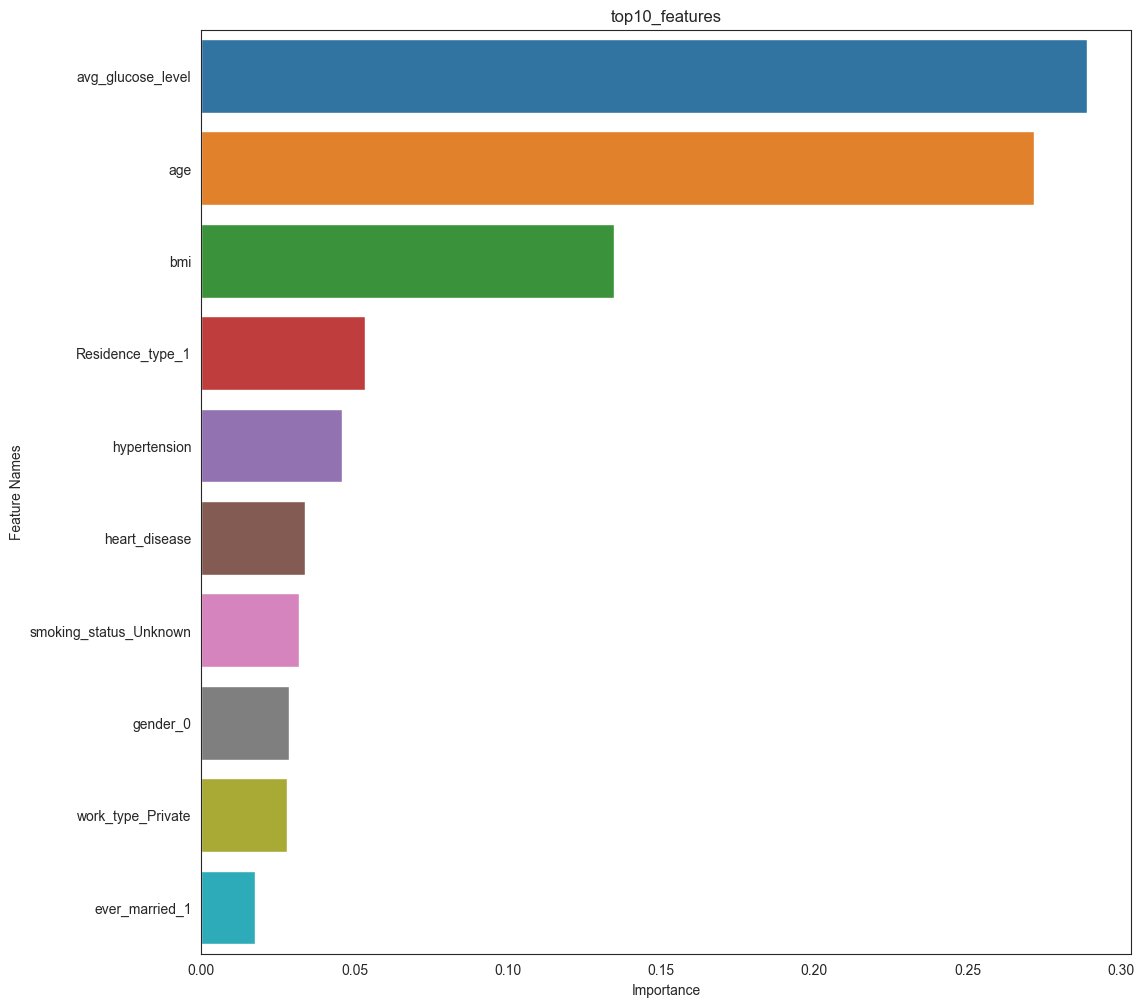

In [87]:
#Visualizing the feature imporatnce
sns.barplot(top10_feature,x='Importance',y='Feature Name')
plt.title("top10_features")
plt.xlabel('Importance')
plt.ylabel('Feature Names')
plt.show()

## Comparing the accuracy of 3 deployed models

In [89]:
data = {'classifier':['Logistic Regression','Decision Tree','Random Forest'],
       '%training_accuracy':[acc_train*100,dt_acc_train*100,rfc_acc_train*100],
       '%test_accuracy':[acc_test*100,dt_acc_test*100, rfc_acc_test*100],
       '%model_accuracy':[acc*100,dt_acc*100,rfc_acc*100]}
df = pd.DataFrame(data)
df

,classifier,%training_accuracy,%test_accuracy,%model_accuracy
0,Logistic Regression,95.376712,94.031311,94.031311
1,Decision Tree,96.917808,93.639922,93.639922
2,Random Forest,100.000000,93.835616,93.835616


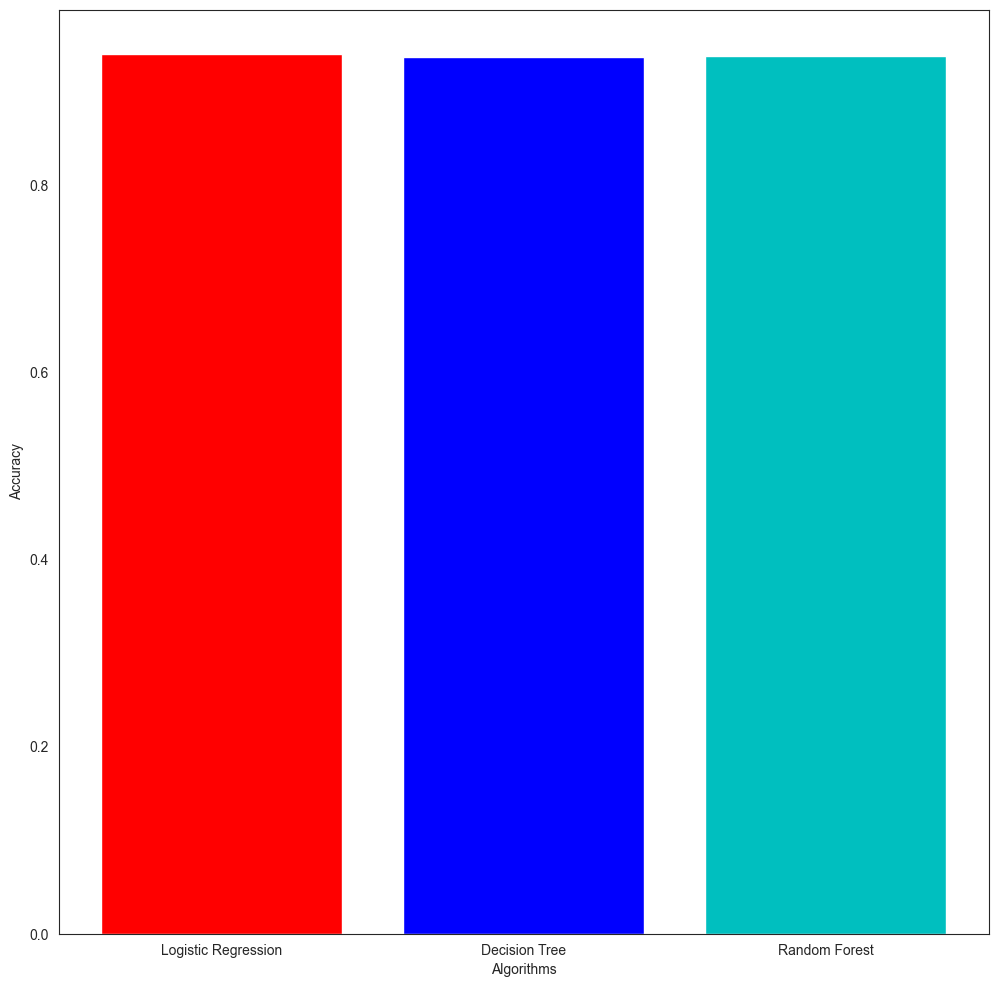

In [94]:
models = ['Logistic Regression','Decision Tree','Random Forest']
accuracy = [acc,dt_acc,rfc_acc]
plt.bar(models,accuracy,color=['r','b','c'])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.show()